# Exploratory Data Analysis of Student Depression by Gender

### First look at data base

DF student-depression on kaggle by Adil Shamim.

In [62]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")
file_path = path + "/student_depression_dataset.csv"
df = pd.read_csv(file_path, sep=",")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [64]:
print(df['Gender'].value_counts())

Gender
Male      15547
Female    12354
Name: count, dtype: int64


Data quantity by gender.

In [65]:
female_df = df[df['Gender'] == 'Female']
male_df = df[df['Gender'] == 'Male'].sample(n=12354)
equal_df = pd.concat([female_df,male_df])

print(equal_df['Gender'].value_counts())

Gender
Female    12354
Male      12354
Name: count, dtype: int64


Equalizing the data quantity for more accurate exploration.

### Since I don't have a specific question to answer with this DataFrame, I decided to analyze it column by column, focusing on the ones I find important and trying to extract as much information as possible to improve my analytical skills. I'll also consider connecting each column to the previous one to gain more context.
### Graphs colors:
1.   Green and Yellow: Graphs for General.
2.   Red: Graphs for Females.
1.   Blue: Graphs for Males.
2.   Gray: Graphs connected to the previous column.




## analyzing the df by colums

### Academic Pressure

In [66]:
equal_df['Academic Pressure'].value_counts()

Academic Pressure
3.0    6569
5.0    5580
4.0    4578
1.0    4253
2.0    3719
0.0       9
Name: count, dtype: int64

As we can see here, the value 0 corresponds to 8 people, so I think it's not necessary to include it in the graphs, I'll remove it only for visualization purposes.

<Axes: title={'center': 'Academic Pressure'}, xlabel='Academic Pressure'>

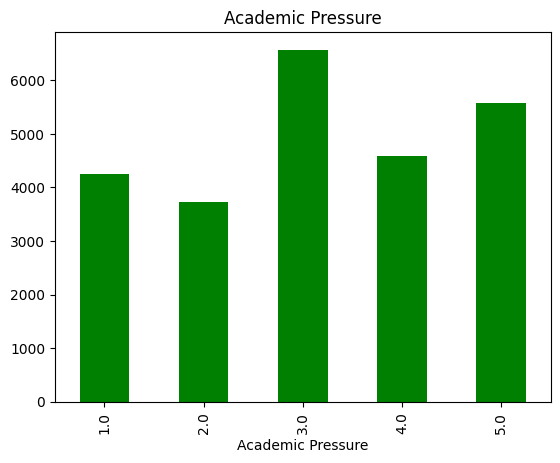

In [67]:
no0 = equal_df.query("`Academic Pressure` > 0")
no0['Academic Pressure'].value_counts().sort_index().plot(kind='bar',title="Academic Pressure",color='green')

The largest concentration of people is between 3 and 5, which means that the majority feel a high level of academic pressure.

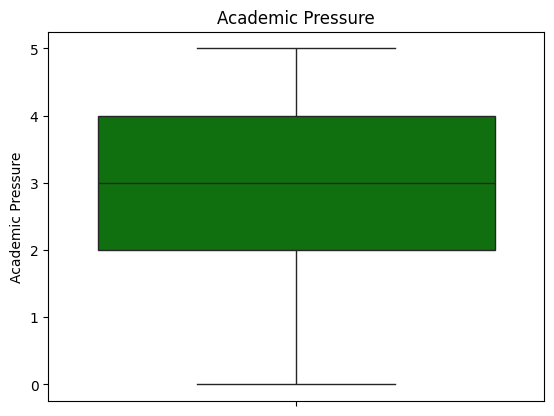


mean of the academic pressure: 3.14108790675085


In [68]:
general = sns.boxplot(equal_df['Academic Pressure'],color='green')
general.set(title="Academic Pressure")
plt.show()
print("\nmean of the academic pressure:",equal_df['Academic Pressure'].mean())

The general graphical distribution of academic pressure shows that 50% of the total distribution lies between 2 and 4. While the mean is 3,15.

In [69]:
print(equal_df.groupby('Gender')['Academic Pressure'].value_counts().sort_index(), end="\n\n")

Gender  Academic Pressure
Female  0.0                     4
        1.0                  2045
        2.0                  1846
        3.0                  3233
        4.0                  2334
        5.0                  2892
Male    0.0                     5
        1.0                  2208
        2.0                  1873
        3.0                  3336
        4.0                  2244
        5.0                  2688
Name: count, dtype: int64



Analyzing the numbers, it seems that females may feel more academic pressure than males. But let's take a look at the graph to confirm this. I'll also remove the value 0 again, as it's not necessary graphically.

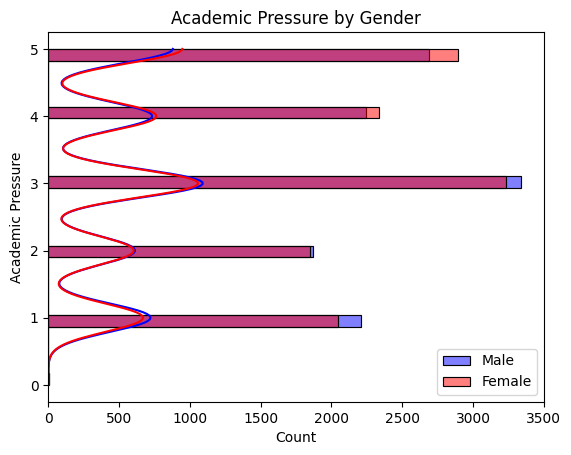


Male mean of the academic pressure notes: 3.107782006640214

Female mean of the academic pressure notes: 3.17668016194332


In [70]:
sns.histplot(data=equal_df[equal_df['Gender'] == 'Male'], y='Academic Pressure', color='Blue', label='Male', kde=True, alpha=0.5)
sns.histplot(data=equal_df[equal_df['Gender'] == 'Female'], y='Academic Pressure', color='Red', label='Female', kde=True, alpha=0.5)
plt.title("Academic Pressure by Gender")
plt.legend()
plt.show()

print("\nMale mean of the academic pressure notes:",no0[no0['Gender']== "Male"]['Academic Pressure'].mean())
print("\nFemale mean of the academic pressure notes:",no0[no0['Gender']== "Female"]['Academic Pressure'].mean())

According to the previous analysis, it is evident that females feel more academic pressure than males.

### CGPA

In [71]:
print("min value",equal_df['CGPA'].min(),end='\n\n')
print("max value",equal_df['CGPA'].max(),end='\n\n')
print("general CGPA mean",equal_df['CGPA'].mean())

min value 0.0

max value 10.0

general CGPA mean 7.6521552735955956


It seems that the values range from 0 to 10. Let's confirm that.

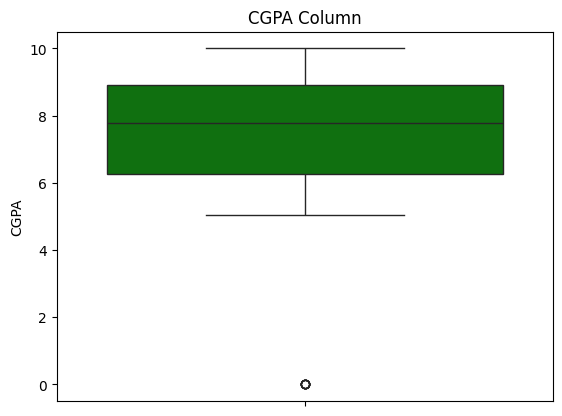

In [72]:
general_cgpa_grap = sns.boxplot(equal_df['CGPA'], color='green')
general_cgpa_grap.set(title="CGPA Column")
plt.show()

The graph only shows values between 5 and 10, but the data suggests the full range is from 0 to 10. A more specific visualization is required.

In [73]:
print(equal_df['CGPA'] == 0)

1        False
3        False
4        False
7        False
13       False
         ...  
24814    False
27410    False
19641    False
17629    False
4459     False
Name: CGPA, Length: 24708, dtype: bool


I noticed it's showing up as a false boolean value, so I'll just remove the value 0 from the column to fix it.

In [74]:
equal_df = equal_df[equal_df['CGPA'] != 0]

In [75]:
print(equal_df['CGPA'].min())

5.03


In [76]:
print(equal_df['Gender'].value_counts())

Gender
Female    12351
Male      12350
Name: count, dtype: int64


As we can see here, it makes no difference in the number of people in the dataframe. Let's analyze it by gender now.

In [77]:
gender_male_cgpa = equal_df[equal_df['Gender'] == 'Male']['CGPA']
gender_female_cgpa = equal_df[equal_df['Gender'] == 'Female']['CGPA']

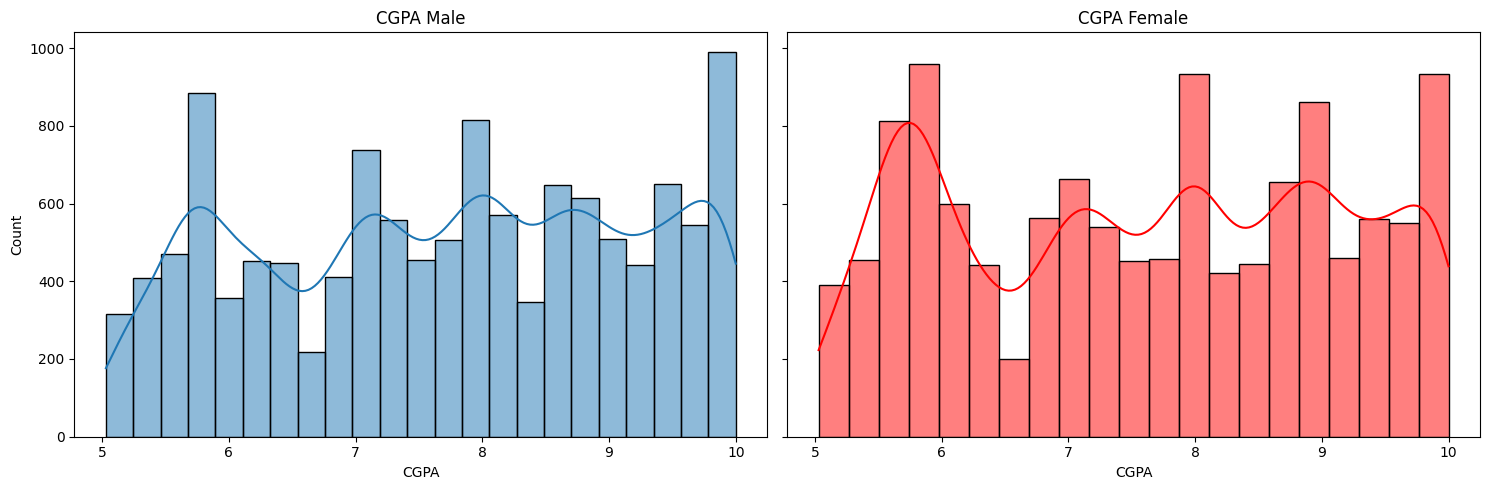

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.histplot(equal_df[equal_df['Gender'] == 'Male']['CGPA'],kde=True, ax=axes[0])
axes[0].set_title("CGPA Male")
sns.histplot(equal_df[equal_df['Gender'] == 'Female']['CGPA'], color="red",kde=True, ax=axes[1])
axes[1].set_title("CGPA Female")
plt.tight_layout()
plt.show()

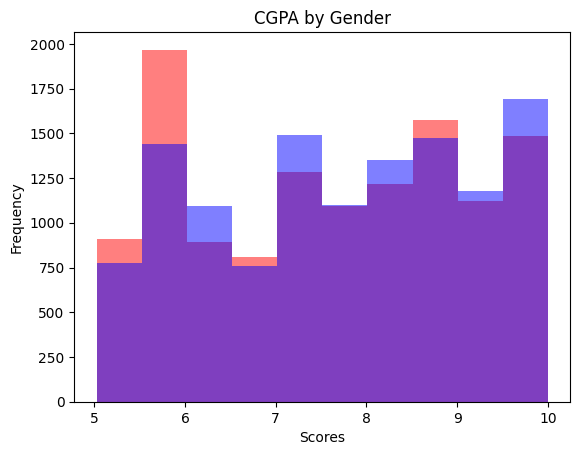

In [79]:
gender_female_cgpa.plot(kind='hist',title="CGPA by Gender",color='red',alpha=0.5)
gender_male_cgpa.plot(kind='hist',color='blue',alpha=0.5)
plt.xlabel('Scores')
plt.show()

In [80]:
print('Female:',end='\n\n')
print('Mean of female score:',gender_female_cgpa.mean())
print('Median of female score:',gender_female_cgpa.median())
print('Standard deviation of female scores:',np.std(gender_female_cgpa))
print('\nMale:',end='\n\n')
print('Mean of male score:',gender_male_cgpa.mean())
print('Median of male score:',gender_male_cgpa.median())
print('Standard deviation of male scores:',np.std(gender_male_cgpa))

Female:

Mean of female score: 7.598490000809651
Median of female score: 7.71
Standard deviation of female scores: 1.4824517190195294

Male:

Mean of male score: 7.710162145748988
Median of male score: 7.82
Standard deviation of male scores: 1.4466537132699253


By analyzing the data, I can say that men have higher scores than women.

To connect with the previous column (Academic Pressure). Without any specific reason, I randomly chose to check how many people have both high academic pressure and a high CGPA, and those with low academic pressure and a high CGPA.

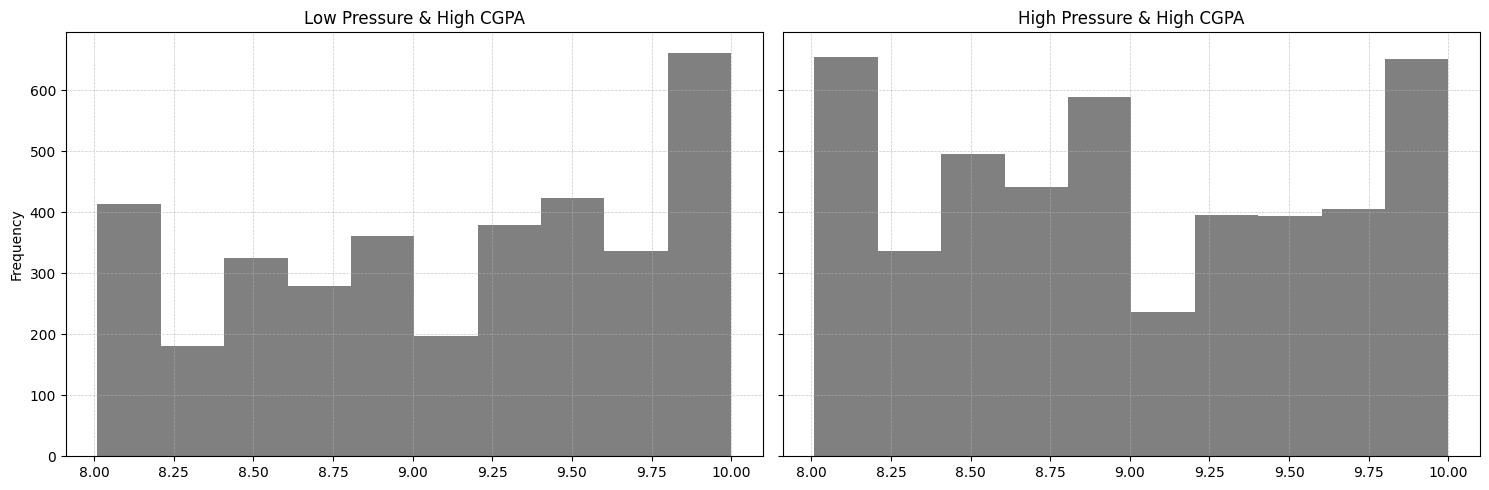


Number of people who have low Academic Pressure and a high CGPA: 3559

Number of people who have high Academic Pressure and a high CGPA: 4600


In [81]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

high_pressure_notes = equal_df.query("`Academic Pressure` > 3 and `CGPA` > 8")
low_pressure_notes = equal_df.query("`Academic Pressure` < 3 and `CGPA` > 8")

low_pressure_notes['CGPA'].plot(kind='hist', color='gray', ax=axes[0])
axes[0].set_title('Low Pressure & High CGPA')
axes[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
high_pressure_notes['CGPA'].plot(kind='hist', color='gray', ax=axes[1])
axes[1].set_title('High Pressure & High CGPA')
axes[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

print('\nNumber of people who have low Academic Pressure and a high CGPA:', low_pressure_notes['CGPA'].count())
print('\nNumber of people who have high Academic Pressure and a high CGPA:', high_pressure_notes['CGPA'].count())

We can see here that  there are more people who have high academic pressure and a high CGPA.

### Study Satisfaction

In [82]:
print(equal_df['Study Satisfaction'].value_counts().sort_index())

Study Satisfaction
0.0       3
1.0    4821
2.0    5180
3.0    5125
4.0    5642
5.0    3930
Name: count, dtype: int64


The value 0 will be unnecessary in the graphs again, so once more, let's remove it.

In [83]:
no0_study = equal_df[equal_df['Study Satisfaction'] != 0]

In [84]:
gender_male_sati = equal_df[equal_df['Gender'] == 'Male']['Study Satisfaction']
gender_female_sati = equal_df[equal_df['Gender'] == 'Female']['Study Satisfaction']

In [85]:
print("Mean of general study satisfaction column: {:.2f}".format(equal_df['Study Satisfaction'].mean()))
print("Mean of female study satisfaction: {:.2f}".format(gender_female_sati.mean()))
print("Mean of male study satisfaction: {:.2f}".format(gender_male_sati.mean()))

Mean of general study satisfaction column: 2.95
Mean of female study satisfaction: 2.97
Mean of male study satisfaction: 2.92


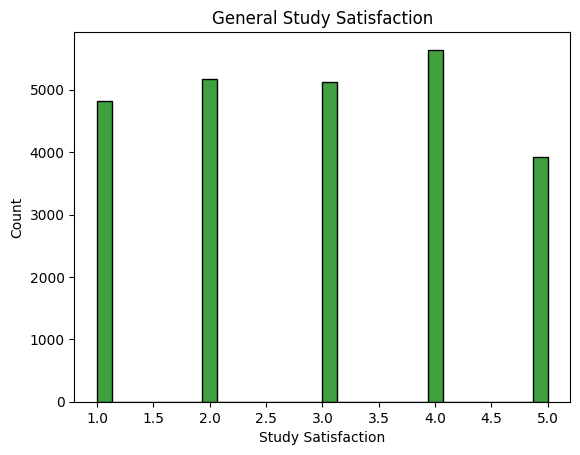

In [86]:
geral_study_grap = sns.histplot(no0_study['Study Satisfaction'], color='green')
geral_study_grap.set(title="General Study Satisfaction")
plt.show()

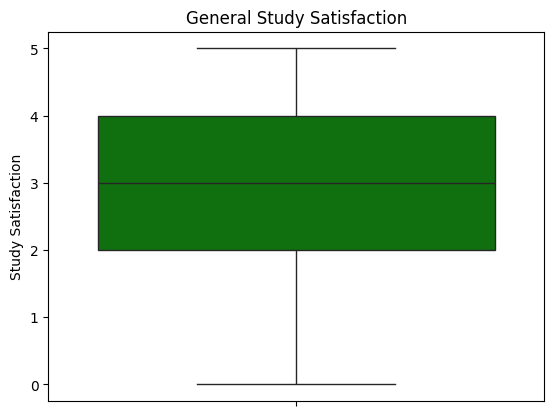

In [87]:
geral_study_grap1 = sns.boxplot(equal_df['Study Satisfaction'], color='green')
geral_study_grap1.set(title="General Study Satisfaction")
plt.show()

The graphs show that the scores follow a medium-to-high trend.

Let's look this column by gender now.

In [88]:
print("Distriution of man's score of",no0_study.query("Gender == 'Male'")['Study Satisfaction'].value_counts().sort_index(), end="\n")
print("\nDistriution of woman's score of",no0_study.query("Gender == 'Female'")['Study Satisfaction'].value_counts().sort_index())

Distriution of man's score of Study Satisfaction
1.0    2470
2.0    2542
3.0    2655
4.0    2821
5.0    1861
Name: count, dtype: int64

Distriution of woman's score of Study Satisfaction
1.0    2351
2.0    2638
3.0    2470
4.0    2821
5.0    2069
Name: count, dtype: int64


In [89]:
print("Standard deviation of female's",np.std(equal_df.query("Gender == 'Female'")['Study Satisfaction']))
print("Standard deviation of male's",np.std(equal_df.query("Gender == 'Male'")['Study Satisfaction']))

Standard deviation of female's 1.3689145796332671
Standard deviation of male's 1.3534824976985573


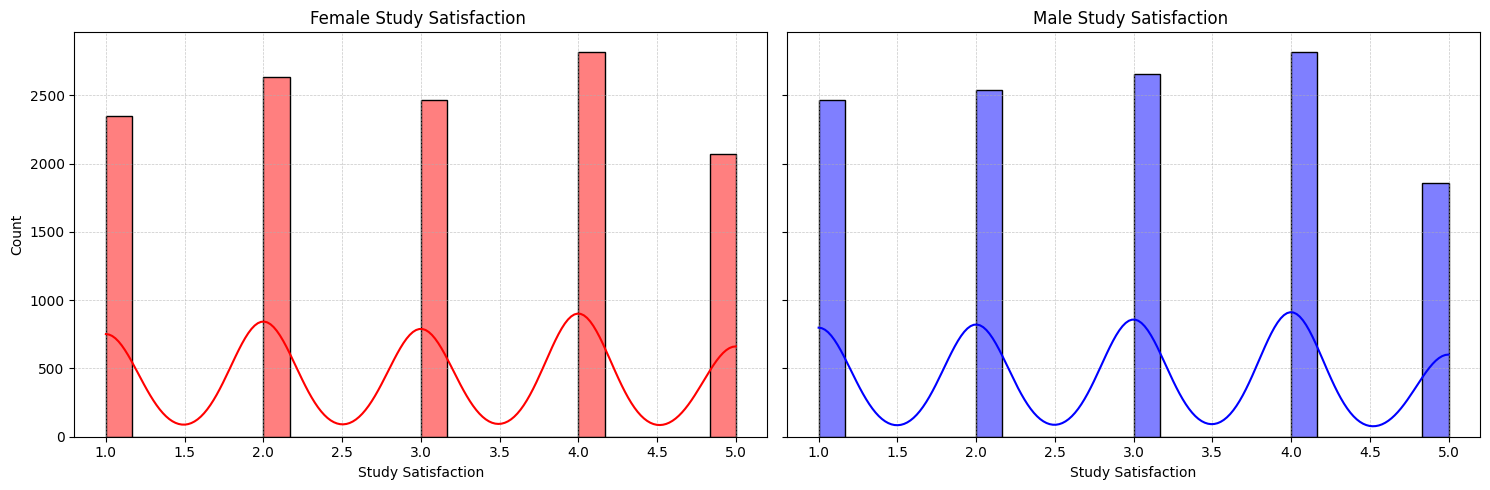

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
female_study_grap = sns.histplot(no0_study.query("Gender == 'Female'")['Study Satisfaction'],color='red',kde=True, ax=axes[0])
axes[0].set(title="Female Study Satisfaction ")
axes[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
male_study_grap = sns.histplot(no0_study.query("Gender == 'Male'")['Study Satisfaction'],color='blue',kde=True, ax=axes[1])
axes[1].set(title="Male Study Satisfaction ")
axes[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

Both graphs has the same pattern. The predominant values are between 2 and 4.

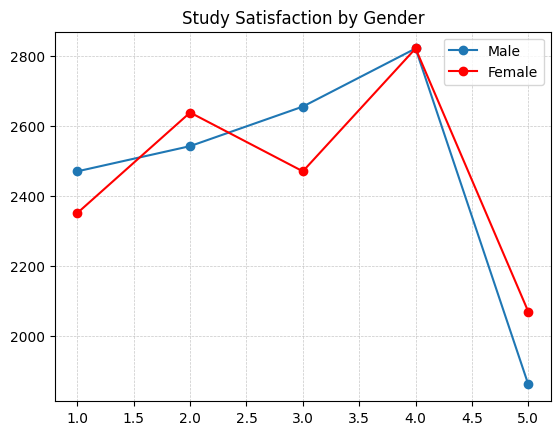

In [91]:
mans_study_satisfaction = (no0_study.query("Gender == 'Male'")['Study Satisfaction'].value_counts().sort_index().to_frame(name='count'))
womens_study_satisfaction = (no0_study.query("Gender == 'Female'")['Study Satisfaction'].value_counts().sort_index().to_frame(name='count'))

plt.plot(mans_study_satisfaction.index, mans_study_satisfaction['count'], label="Male", marker='o')
plt.plot(womens_study_satisfaction.index, womens_study_satisfaction['count'], label="Female", marker='o',color='red')
plt.title("Study Satisfaction by Gender")
plt.legend()
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

To me, women are clearly stay more satisfied with their studies than man.

In [92]:
count_male_study = no0_study.query("Gender == 'Male'")['Study Satisfaction'].value_counts()
count_male_study = count_male_study.to_frame()
print("The sum of male scores: ",count_male_study['count'].sum())

count_female_study = no0_study.query("Gender == 'Female'")['Study Satisfaction'].value_counts()
count_female_study = count_female_study.to_frame()
print("The sum of female scores: ",count_female_study['count'].sum())

The sum of male scores:  12349
The sum of female scores:  12349


What if we want the scores those who have high study satisfaction?

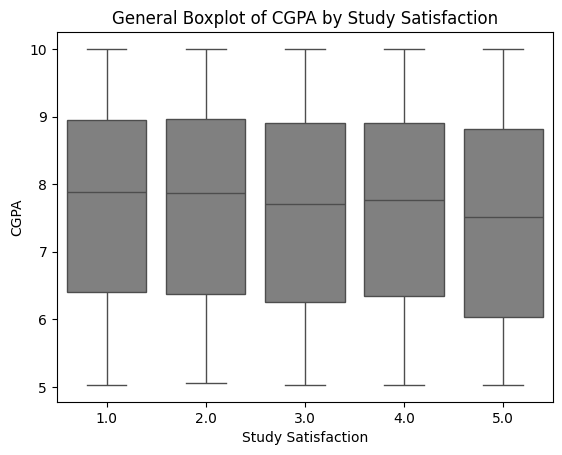

In [93]:
sns.boxplot(data=no0_study, x='Study Satisfaction', y='CGPA', color='gray')
plt.title("General Boxplot of CGPA by Study Satisfaction")
plt.xlabel("Study Satisfaction")
plt.ylabel("CGPA")
plt.show()

In [94]:
high_satis_cgpa = equal_df[equal_df['Study Satisfaction'] >= 4]
qnt_gender_male_5 = high_satis_cgpa.query("Gender == 'Male'")['CGPA'].count()
print("Quantity of men who have study satisfaction >= 4: ",qnt_gender_male_5)
qnt_gender_female_5 = high_satis_cgpa.query("Gender == 'Female'")['CGPA'].count()
print("Quantity of woman who have study satisfaction >= 4: ",qnt_gender_female_5)
low_satis_cgpa = equal_df[equal_df['Study Satisfaction'] <= 2]
qnt_gender_male_0 = low_satis_cgpa.query("Gender == 'Male'")['CGPA'].count()
print("Quantity of men who have study satisfaction <= 2: ",qnt_gender_male_0)
qnt_gender_female_0 = low_satis_cgpa.query("Gender == 'Female'")['CGPA'].count()
print("Quantity of woman who have study satisfaction <= 2: ",qnt_gender_female_0)

Quantity of men who have study satisfaction >= 4:  4682
Quantity of woman who have study satisfaction >= 4:  4890
Quantity of men who have study satisfaction <= 2:  5013
Quantity of woman who have study satisfaction <= 2:  4991


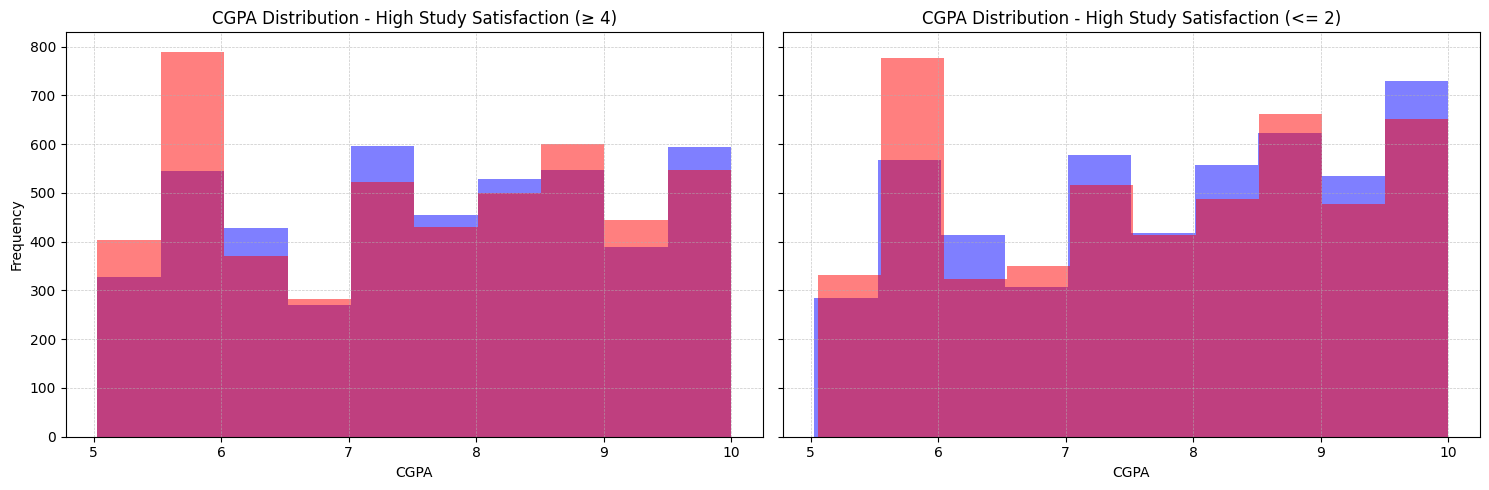

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

equal_df.query("Gender == 'Male'").query("`Study Satisfaction` >= 4")['CGPA'].plot(kind='hist',color='blue', ax=axes[0],alpha=0.5)
equal_df.query("Gender == 'Female'").query("`Study Satisfaction` >= 4")['CGPA'].plot(kind='hist',color='red', ax=axes[0],alpha=0.5)
axes[0].set(title="CGPA Distribution - High Study Satisfaction (≥ 4)",xlabel="CGPA",ylabel="Frequency")
axes[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
equal_df.query("Gender == 'Male'").query("`Study Satisfaction` <= 2")['CGPA'].plot(kind='hist',color='blue', ax=axes[1],alpha=0.5)
equal_df.query("Gender == 'Female'").query("`Study Satisfaction` <= 2")['CGPA'].plot(kind='hist',color='red', ax=axes[1],alpha=0.5)
axes[1].set(title="CGPA Distribution - High Study Satisfaction (<= 2)",xlabel="CGPA",ylabel="Frequency")
axes[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

graph showing distrubution of man and woman by score

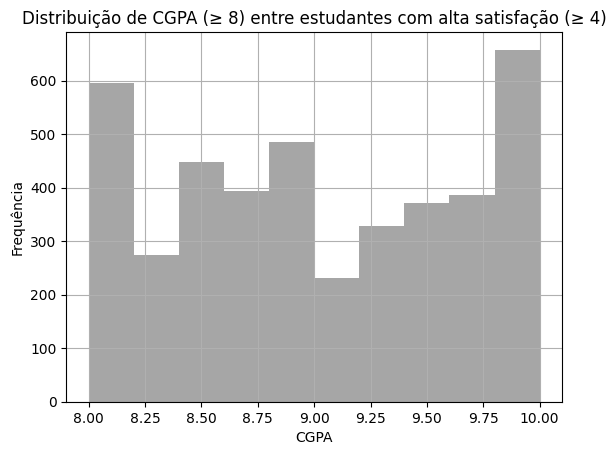


Quantity of woman who have study satisfaction ≥ 4 and CGPA ≥ 8: 2106

Quantity of man who have study satisfaction ≥ 4 and CGPA ≥ 8: 2067


In [96]:
graph_high_satis = high_satis_cgpa[high_satis_cgpa['CGPA'] >= 8]
graph_high_satis['CGPA'].plot(kind='hist', bins=10, color='gray', alpha=0.7)
plt.title('Distribuição de CGPA (≥ 8) entre estudantes com alta satisfação (≥ 4)')
plt.xlabel('CGPA')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

high_satis_cgpa_10 = high_satis_cgpa[high_satis_cgpa['CGPA'] >= 8]
woman_cgpa_10 = high_satis_cgpa_10.query("Gender == 'Female'")['CGPA'].count()
man_cgpa_10 = high_satis_cgpa_10.query("Gender == 'Male'")['CGPA'].count()
print("\nQuantity of woman who have study satisfaction ≥ 4 and CGPA ≥ 8:",woman_cgpa_10)
print("\nQuantity of man who have study satisfaction ≥ 4 and CGPA ≥ 8:",man_cgpa_10)

As expected, female students report higher levels of study satisfaction, while male students tend to have slightly higher CGPA scores. However, the differences between the two groups are relatively small.

### Sleep Duration

In [97]:
print(equal_df['Sleep Duration'].value_counts())

Sleep Duration
'Less than 5 hours'    7292
'7-8 hours'            6511
'5-6 hours'            5515
'More than 8 hours'    5368
Others                   15
Name: count, dtype: int64


I think the 'others' category won't fit well in the graph, so I'll remove it for better visualization.

In [98]:
noothers = equal_df[equal_df['Sleep Duration'] != 'Others']
print(noothers['Sleep Duration'].value_counts())

Sleep Duration
'Less than 5 hours'    7292
'7-8 hours'            6511
'5-6 hours'            5515
'More than 8 hours'    5368
Name: count, dtype: int64


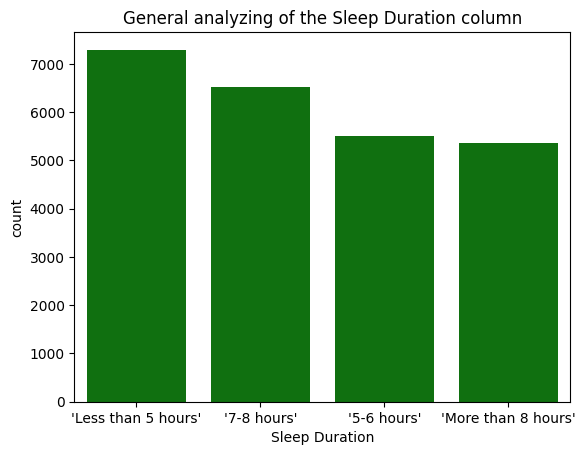

In [99]:
sns.barplot(noothers['Sleep Duration'].value_counts(),color='green')
plt.title("General analyzing of the Sleep Duration column")
plt.show()

It's ok, but how many people sleep well and badly?

Number of people who sleep well: 11879

Number of people who sleep badly: 12807



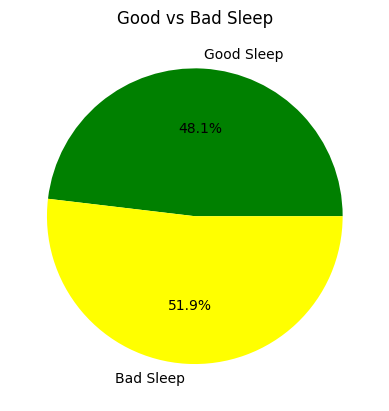

In [100]:
only_sleep = equal_df['Sleep Duration']
good_sleep = only_sleep[(only_sleep =="'More than 8 hours'") | (only_sleep =="'7-8 hours'")].count()
bad_sleep = only_sleep[(only_sleep =="'Less than 5 hours'") | (only_sleep =="'5-6 hours'")].count()

print("Number of people who sleep well:",good_sleep)
print("\nNumber of people who sleep badly:",bad_sleep,end='\n\n')

good_bad_sleep = pd.Series({'Good Sleep': good_sleep, 'Bad Sleep':bad_sleep})
colors=['green','yellow']
good_bad_sleep.plot(kind='pie',title="Good vs Bad Sleep",autopct='%1.1f%%',colors=colors)
plt.show()

The group that has the most members is the one of people who sleep badly and I think I fit into it. Let's continue analyzing by gender.

In [101]:
print("Distribution of female ",equal_df.query("Gender=='Female'")['Sleep Duration'].value_counts(),end='\n\n')
print("Distribution of male",equal_df.query("Gender=='Male'")['Sleep Duration'].value_counts(),end='\n\n')

man_sleep = noothers[noothers['Gender'] == 'Male']['Sleep Duration'].value_counts().to_frame().reset_index().sort_index(ascending=True)
woman_sleep = noothers[noothers['Gender'] == 'Female']['Sleep Duration'].value_counts().to_frame().reset_index().sort_index(ascending=True)

Distribution of female  Sleep Duration
'Less than 5 hours'    3626
'7-8 hours'            3291
'5-6 hours'            2789
'More than 8 hours'    2636
Others                    9
Name: count, dtype: int64

Distribution of male Sleep Duration
'Less than 5 hours'    3666
'7-8 hours'            3220
'More than 8 hours'    2732
'5-6 hours'            2726
Others                    6
Name: count, dtype: int64



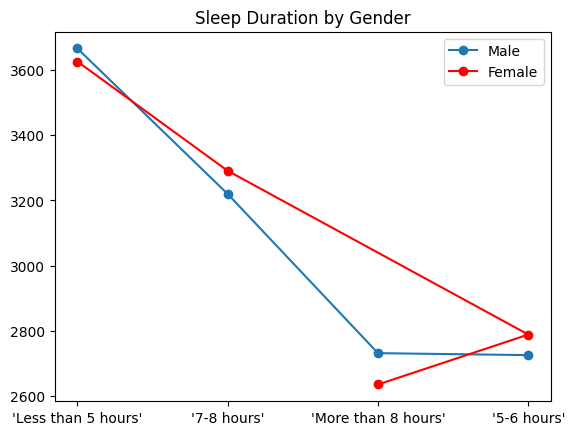

In [102]:
plt.plot(man_sleep['Sleep Duration'], man_sleep['count'], label="Male", marker='o')
plt.plot(woman_sleep['Sleep Duration'], woman_sleep['count'], label="Female", marker='o', color='red')
plt.title("Sleep Duration by Gender")
plt.legend()
plt.show()

In [103]:
female_sleep = equal_df.query("Gender=='Female'")['Sleep Duration'].value_counts()
male_sleep = equal_df.query("Gender=='Male'")['Sleep Duration'].value_counts()

good_sleep_female = female_sleep.loc[["'7-8 hours'", "'More than 8 hours'"]].sum()
print("Number of females who sleep well('7-8 hours' + 'More than 8 hours'):",good_sleep_female)
good_sleep_male = male_sleep.loc[["'7-8 hours'", "'More than 8 hours'"]].sum()
print("Number of males who sleep well('7-8 hours' + 'More than 8 hours'):",good_sleep_male)

bad_sleep_female = female_sleep.loc[["'5-6 hours'", "'Less than 5 hours'"]].sum()
print("Number of females who sleep badly('5-6 hours'", "'Less than 5 hours'):",bad_sleep_female)
bad_sleep_male = male_sleep.loc[["'5-6 hours'", "'Less than 5 hours'"]].sum()
print("Number of males who sleep badly('5-6 hours'", "'Less than 5 hours'):",bad_sleep_male)

Number of females who sleep well('7-8 hours' + 'More than 8 hours'): 5927
Number of males who sleep well('7-8 hours' + 'More than 8 hours'): 5952
Number of females who sleep badly('5-6 hours' 'Less than 5 hours'): 6415
Number of males who sleep badly('5-6 hours' 'Less than 5 hours'): 6392


The analysis suggests that men and woman sleep sleep a similar amount of hours.

Now, in the connection on previous column, I want to see how sleep is related to study satisfaction.

In [104]:
sleep_satis = noothers.groupby("Sleep Duration")['Study Satisfaction'].value_counts().sort_index()
print(sleep_satis)

Less_than_5 = sleep_satis.xs("'Less than 5 hours'", level="Sleep Duration")
hours_5_6 = sleep_satis.xs("'5-6 hours'", level="Sleep Duration")
hours_7_8 = sleep_satis.xs("'7-8 hours'", level="Sleep Duration")
more_than_8 = sleep_satis.xs("'More than 8 hours'", level="Sleep Duration")

Sleep Duration       Study Satisfaction
'5-6 hours'          0.0                      1
                     1.0                   1051
                     2.0                   1151
                     3.0                   1185
                     4.0                   1243
                     5.0                    884
'7-8 hours'          1.0                   1258
                     2.0                   1348
                     3.0                   1420
                     4.0                   1485
                     5.0                   1000
'Less than 5 hours'  0.0                      2
                     1.0                   1452
                     2.0                   1585
                     3.0                   1453
                     4.0                   1666
                     5.0                   1134
'More than 8 hours'  1.0                   1057
                     2.0                   1093
                     3.0                   1066


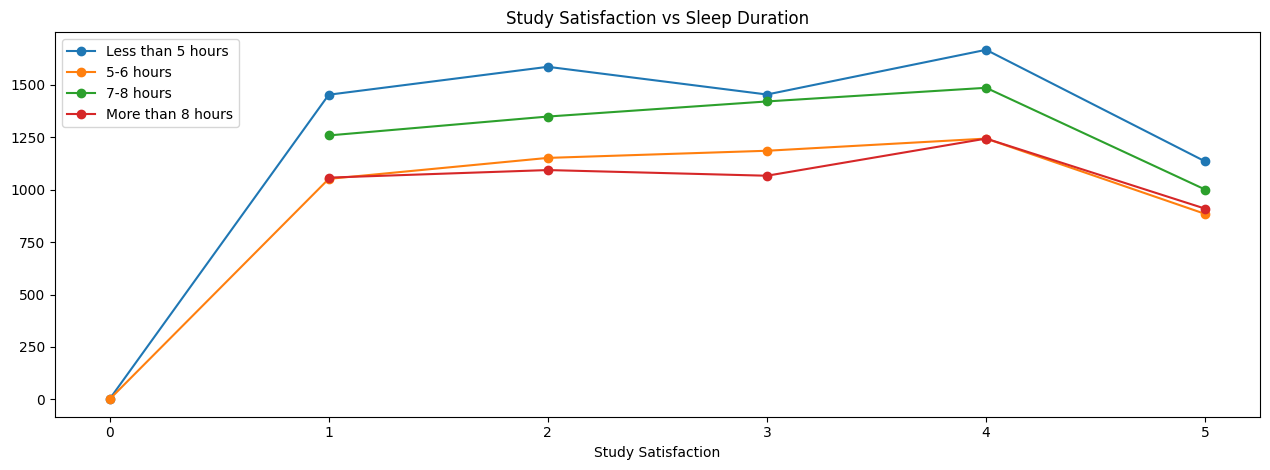

In [105]:
Less_than_5.plot(kind='line', title="Sleep Duration Low Satisfaction", label = "Less than 5 hours", marker='o')
hours_5_6.plot(kind='line', title="Sleep Duration Medium Satisfaction", label = "5-6 hours", marker='o' )
hours_7_8.plot(kind='line', title="Sleep Duration High Satisfaction", label = "7-8 hours", marker='o' )
more_than_8.plot(kind='line', title="Sleep Duration Very High Satisfaction", label = "More than 8 hours", marker='o' )
plt.title("Study Satisfaction vs Sleep Duration")
plt.legend()
plt.tight_layout(rect=[0, 0, 2, 1])
plt.show()

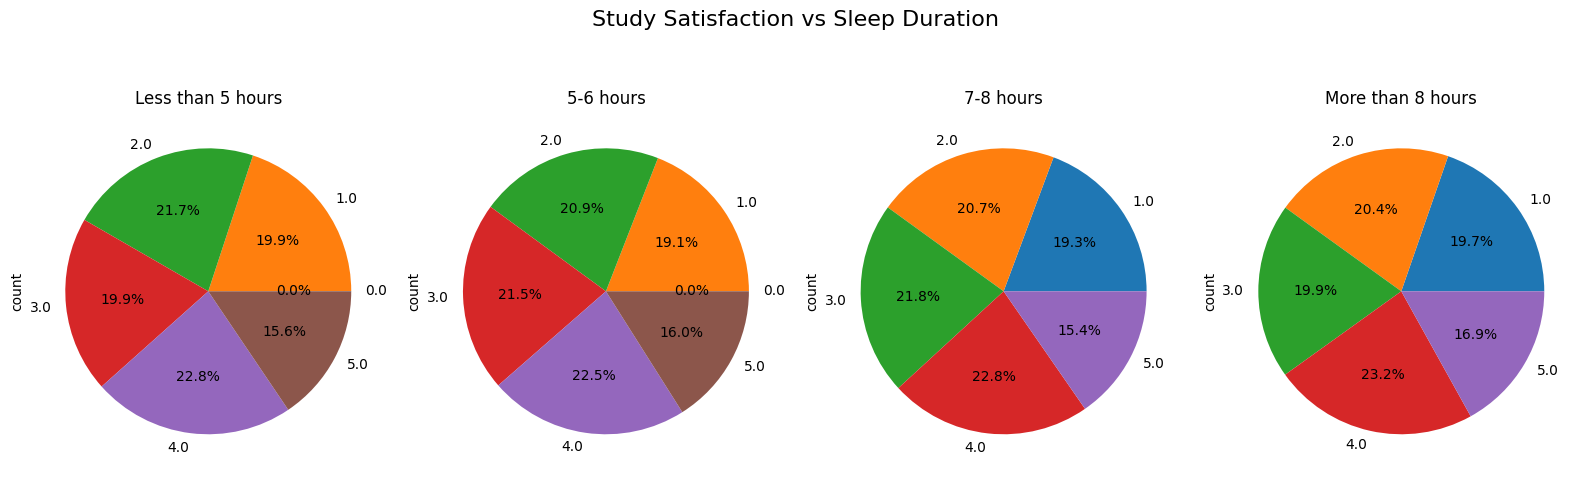

In [106]:
fig, axs = plt.subplots(1,4, figsize=(16, 8))

Less_than_5.plot(kind='pie', ax=axs[0], title="Less than 5 hours", autopct='%1.1f%%',legend=False)
hours_5_6.plot(kind='pie', ax=axs[1], title="5-6 hours", autopct='%1.1f%%',legend=False)
hours_7_8.plot(kind='pie', ax=axs[2], title="7-8 hours", autopct='%1.1f%%',legend=False)
more_than_8.plot(kind='pie', ax=axs[3], title="More than 8 hours", autopct='%1.1f%%',legend=False)
fig.suptitle("Study Satisfaction vs Sleep Duration", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1.3])
plt.show()

The graphs are almost the same, it suggests that study satisfaction might not have a significant impact on sleep duration.

### Dietary Habits

In [107]:
print(equal_df['Dietary Habits'].unique())
print(equal_df['Dietary Habits'].value_counts())

['Moderate' 'Unhealthy' 'Healthy' 'Others']
Dietary Habits
Unhealthy    9059
Moderate     8812
Healthy      6818
Others         12
Name: count, dtype: int64


the 'others' category won't fit well in the graph AGAIN, so I'll remove it for better visualization.

In [108]:
equal_df = equal_df[equal_df['Dietary Habits'] != 'Others']
print(equal_df['Dietary Habits'].unique())

['Moderate' 'Unhealthy' 'Healthy']


<Axes: title={'center': 'General Dietary Habits'}, xlabel='Dietary Habits'>

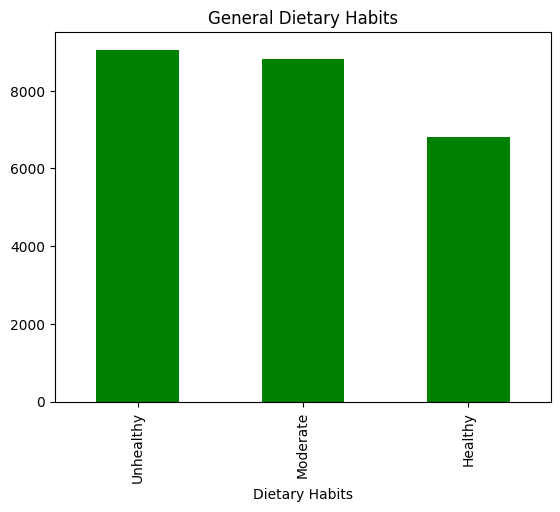

In [109]:
equal_df['Dietary Habits'].value_counts().plot(kind='bar',title="General Dietary Habits",color='green')

I can say with confidence that maintaining a healthy diet is difficult.

let's see if the df by gender says the same thing

In [110]:
diet_male = equal_df[equal_df['Gender'] == 'Male']['Dietary Habits'].value_counts()
diet_female = equal_df[equal_df['Gender'] == 'Female']['Dietary Habits'].value_counts()

print("Dietary habits:",diet_male, end='\n\n')
print("Dietary habits:",diet_female)

Dietary habits: Dietary Habits
Unhealthy    4917
Moderate     4231
Healthy      3194
Name: count, dtype: int64

Dietary habits: Dietary Habits
Moderate     4581
Unhealthy    4142
Healthy      3624
Name: count, dtype: int64


<Axes: title={'center': 'Diet Male vs Female'}, xlabel='Dietary Habits'>

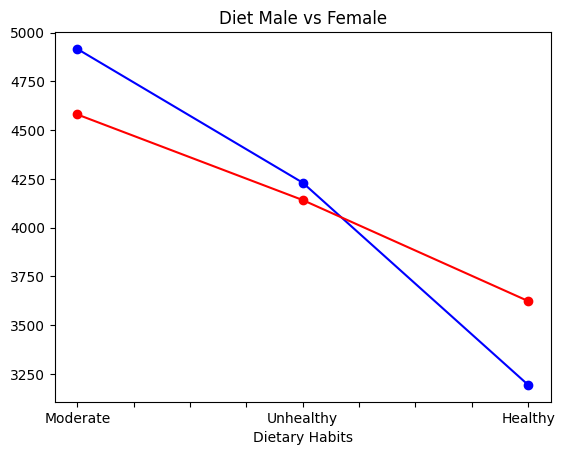

In [111]:
diet_male.plot(kind='line',title="Diet Male vs Female",color='blue', label="Male", marker='o')
diet_female.plot(kind='line',color='red', label="Female", marker='o')

Based on the data, women irrefutably have a healthier diet than men.

As part of connecting with the previous columns, why not look at the dietary habits of people who sleep more than 8 hours and less than 5 hours?

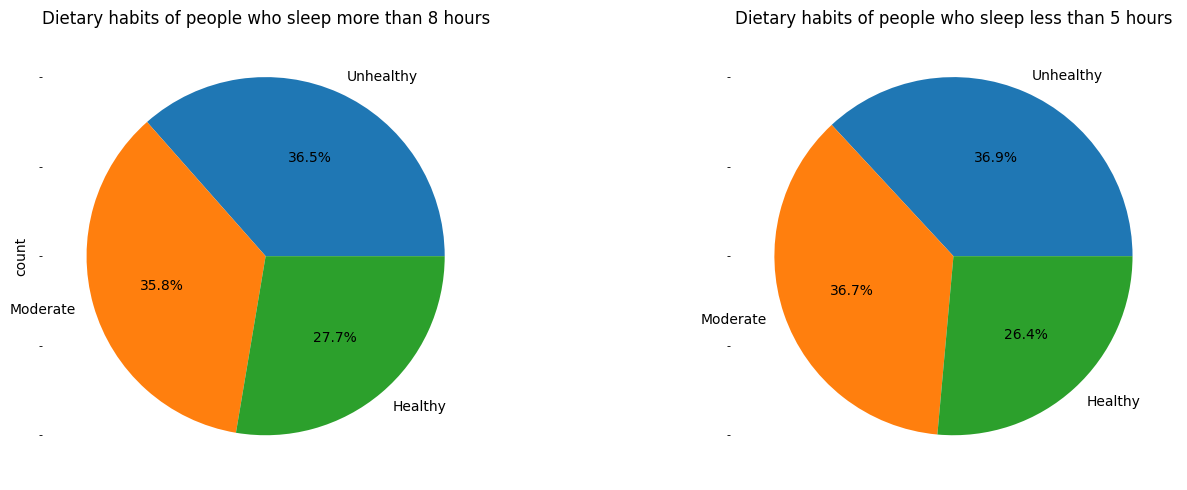

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

diet_sleep_more_8 = equal_df[equal_df['Sleep Duration'] == "'More than 8 hours'"]['Dietary Habits'].value_counts()
diet_sleep_more_8.plot(kind='pie',title="Dietary habits of people who sleep more than 8 hours",autopct='%1.1f%%', ax=axes[0])

diet_sleep_less_5 = equal_df[equal_df['Sleep Duration'] == "'Less than 5 hours'"]['Dietary Habits'].value_counts()
diet_sleep_less_5.plot(kind='pie',title="Dietary habits of people who sleep less than 5 hours",autopct='%1.1f%%', ax=axes[1])
plt.tight_layout()
plt.show()

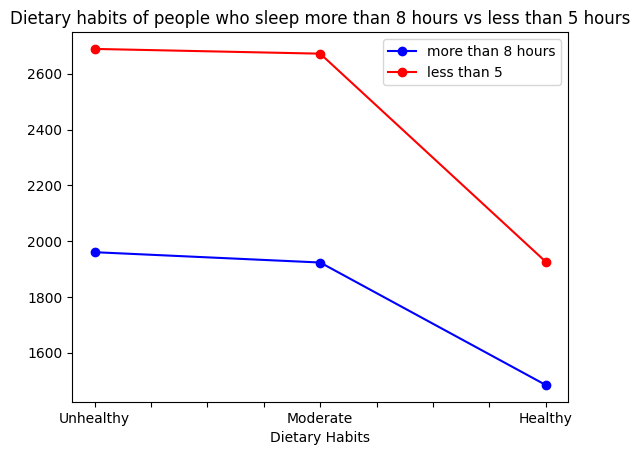

In [113]:
diet_sleep_more_8 = equal_df[equal_df['Sleep Duration'] == "'More than 8 hours'"]['Dietary Habits'].value_counts().plot(kind='line',color='blue', label="more than 8 hours", marker='o')
diet_sleep_less_5 = equal_df[equal_df['Sleep Duration'] == "'Less than 5 hours'"]['Dietary Habits'].value_counts().plot(kind='line',color='red', label="less than 5", marker='o')
plt.legend()
plt.title("Dietary habits of people who sleep more than 8 hours vs less than 5 hours")
plt.show()

A lot more people sleep less than 5 hours, but despite the difference in numbers, the pie charts show a similar pattern.

### Suicidal Thoughts, Depression and Family History of Mental Illness

I decided to analyze these columns together because they are boolean values.

In [114]:
bool_columns = equal_df[['Have you ever had suicidal thoughts ?', 'Depression', 'Family History of Mental Illness']].value_counts()
bool_columns = bool_columns.to_frame().reset_index()
bool_columns

,Have you ever had suicidal thoughts ?,Depression,Family History of Mental Illness,count
0,Yes,1,Yes,6297
1,Yes,1,No,6067
2,No,0,No,3798
3,No,0,Yes,3187
4,Yes,0,No,1805
5,Yes,0,Yes,1437
6,No,1,Yes,1083
7,No,1,No,1015


Let's transform these values 1 and 0 into 'Yes' and 'No', and analyze the impact of depression on suicidal thoughts.

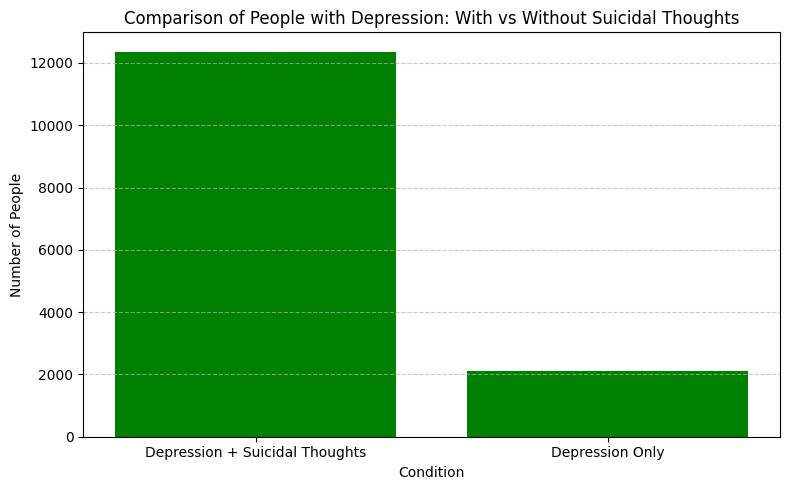

In [115]:
suicidal_depression = equal_df[['Have you ever had suicidal thoughts ?', 'Depression']].value_counts()
suicidal_depression = suicidal_depression.to_frame().reset_index()
suicidal_depression['Depression'] = suicidal_depression['Depression'].replace({1: 'Yes', 0: 'No'})

boll_suicidal_depression = suicidal_depression[(suicidal_depression['Have you ever had suicidal thoughts ?'] == 'Yes') & (suicidal_depression['Depression'] == 'Yes')]
boll_no_suicidal_depression = suicidal_depression[(suicidal_depression['Have you ever had suicidal thoughts ?'] == 'No') & (suicidal_depression['Depression'] == 'Yes')]

group = boll_suicidal_depression.groupby('Depression')['count'].sum().reset_index()
group2 = boll_no_suicidal_depression.groupby('Depression')['count'].sum().reset_index()

with_thoughts = group['count'].values[0] if not group.empty else 0
without_thoughts = group2['count'].values[0] if not group2.empty else 0

data = pd.DataFrame({'Condition': ['Depression + Suicidal Thoughts', 'Depression Only'],'Count': [with_thoughts, without_thoughts]
})

plt.figure(figsize=(8, 5))
plt.bar(data['Condition'], data['Count'], color='green')
plt.title("Comparison of People with Depression: With vs Without Suicidal Thoughts")
plt.ylabel("Number of People")
plt.xlabel("Condition")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As we can see in the graph, depression has a huge impact on suicidal thoughts. But what's the impact of a family history of Mmental illness on depression?

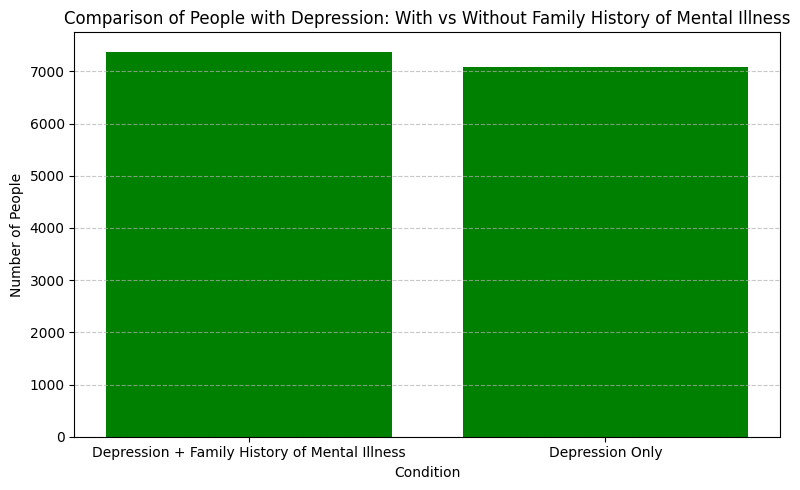

In [116]:
family_mental = equal_df[['Family History of Mental Illness', 'Depression']].value_counts()
family_mental = family_mental.to_frame().reset_index()
family_mental['Depression'] = family_mental['Depression'].replace({1: 'Yes', 0: 'No'})

boll_family_mental = family_mental[(family_mental['Family History of Mental Illness'] == 'Yes') & (family_mental['Depression'] == 'Yes')]
boll_no_family_mental = family_mental[(family_mental['Family History of Mental Illness'] == 'No') & (family_mental['Depression'] == 'Yes')]

group3 = boll_family_mental.groupby('Depression')['count'].sum().reset_index()
group4 = boll_no_family_mental.groupby('Depression')['count'].sum().reset_index()

with_thoughts2 = group3['count'].values[0] if not group.empty else 0
without_thoughts2 = group4['count'].values[0] if not group2.empty else 0

data = pd.DataFrame({'Condition': ['Depression + Family History of Mental Illness', 'Depression Only'],'Count': [with_thoughts2, without_thoughts2]
})

plt.figure(figsize=(8, 5))
plt.bar(data['Condition'], data['Count'], color='green')
plt.title("Comparison of People with Depression: With vs Without Family History of Mental Illness")
plt.ylabel("Number of People")
plt.xlabel("Condition")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As we can see in the graph, family history of mental illness doesn't have an impact on depression

  Let's analyze the columns by gender now

In [117]:
gender_bool_columns = equal_df[['Gender','Have you ever had suicidal thoughts ?', 'Depression', 'Family History of Mental Illness']].value_counts()
gender_bool_columns = gender_bool_columns.to_frame().reset_index()
gender_bool_columns['Depression'] = gender_bool_columns['Depression'].replace({1: 'Yes', 0: 'No'})

male_bool_columns = gender_bool_columns[gender_bool_columns['Gender'] == 'Male']
female_bool_columns = gender_bool_columns[gender_bool_columns['Gender'] == 'Female']
female_bool_columns

,Gender,Have you ever had suicidal thoughts ?,Depression,Family History of Mental Illness,count
0,Female,Yes,Yes,Yes,3208
3,Female,Yes,Yes,No,2988
5,Female,No,No,No,1890
6,Female,No,No,Yes,1616
9,Female,Yes,No,No,896
10,Female,Yes,No,Yes,729
13,Female,No,Yes,Yes,533
15,Female,No,Yes,No,487


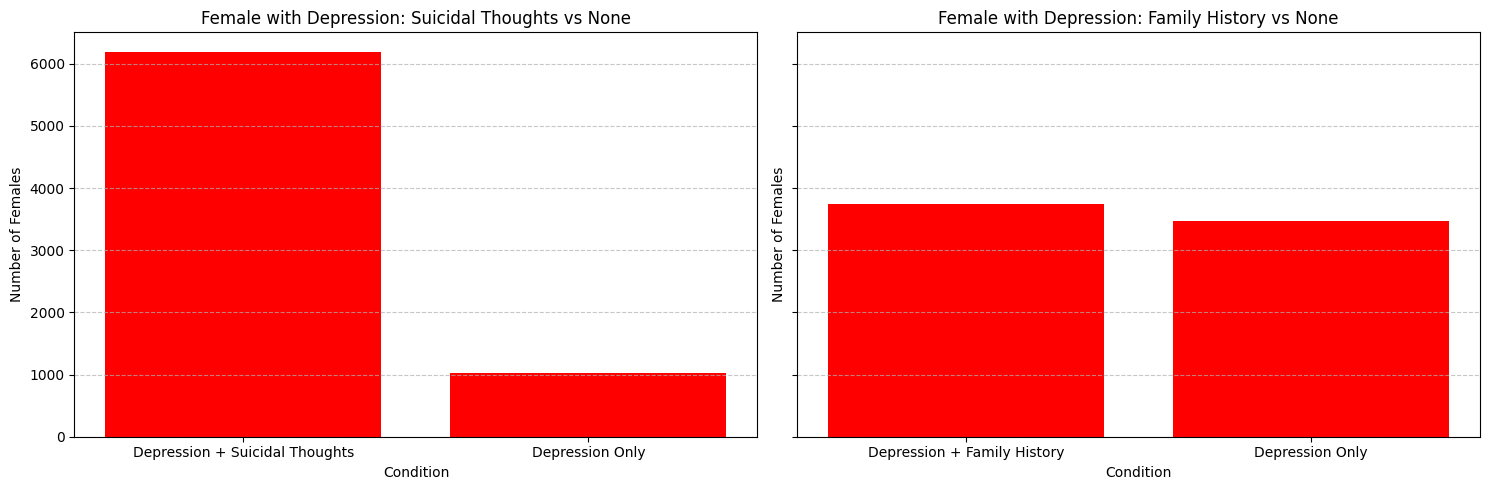

In [118]:
new_female_bool_columns = female_bool_columns[['Family History of Mental Illness', 'Depression','count']].value_counts()
new_female_bool_columns = new_female_bool_columns.rename("counts").reset_index()

female_family_mental = new_female_bool_columns[(new_female_bool_columns['Family History of Mental Illness'] == 'Yes') & (new_female_bool_columns['Depression'] == 'Yes')]
female_no_family_mental = new_female_bool_columns[(new_female_bool_columns['Family History of Mental Illness'] == 'No') & (new_female_bool_columns['Depression'] == 'Yes')]

group5 = female_family_mental.groupby('Depression')['count'].sum().reset_index()
group6 = female_no_family_mental.groupby('Depression')['count'].sum().reset_index()

with_family_history = group5['count'].values[0] if not group5.empty else 0
without_family_history = group6['count'].values[0] if not group6.empty else 0

new1_female_bool_columns = female_bool_columns[['Have you ever had suicidal thoughts ?', 'Depression','count']].value_counts()
new1_female_bool_columns = new1_female_bool_columns.rename("counts").reset_index()

female_suicidal = new1_female_bool_columns[(new1_female_bool_columns['Have you ever had suicidal thoughts ?'] == 'Yes') & (new1_female_bool_columns['Depression'] == 'Yes')]
female_no_suicidal = new1_female_bool_columns[(new1_female_bool_columns['Have you ever had suicidal thoughts ?'] == 'No') & (new1_female_bool_columns['Depression'] == 'Yes')]

group7 = female_suicidal.groupby('Depression')['count'].sum().reset_index()
group8 = female_no_suicidal.groupby('Depression')['count'].sum().reset_index()

with_suicidal_thoughts = group7['count'].values[0] if not group7.empty else 0
without_suicidal_thoughts = group8['count'].values[0] if not group8.empty else 0

data1 = pd.DataFrame({
    'Condition': ['Depression + Suicidal Thoughts', 'Depression Only'],
    'Count': [with_suicidal_thoughts, without_suicidal_thoughts]
})

data2 = pd.DataFrame({
    'Condition': ['Depression + Family History', 'Depression Only'],
    'Count': [with_family_history, without_family_history]
})

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

axes[0].bar(data1['Condition'], data1['Count'], color='red')
axes[0].set_title("Female with Depression: Suicidal Thoughts vs None")
axes[0].set_ylabel("Number of Females")
axes[0].set_xlabel("Condition")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(data2['Condition'], data2['Count'], color='red')
axes[1].set_title("Female with Depression: Family History vs None")
axes[1].set_ylabel("Number of Females")
axes[1].set_xlabel("Condition")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

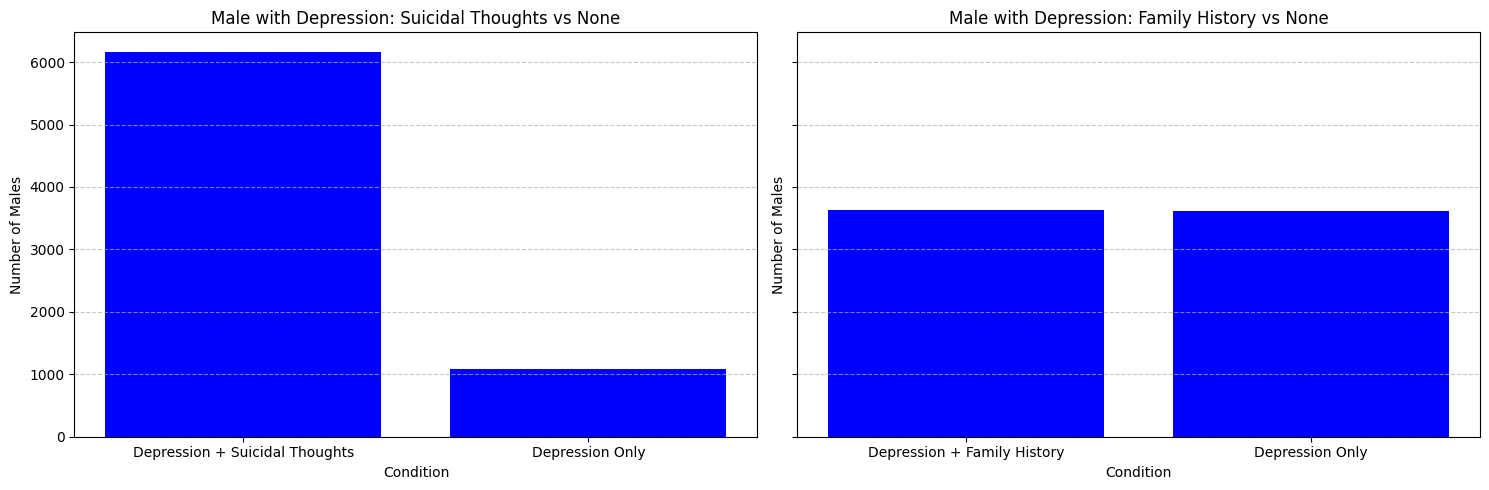

In [119]:
new_male_bool_columns = male_bool_columns[['Family History of Mental Illness', 'Depression','count']].value_counts()
new_male_bool_columns = new_male_bool_columns.rename("counts").reset_index()

male_family_mental = new_male_bool_columns[(new_male_bool_columns['Family History of Mental Illness'] == 'Yes') & (new_male_bool_columns['Depression'] == 'Yes')]
male_no_family_mental = new_male_bool_columns[(new_male_bool_columns['Family History of Mental Illness'] == 'No') & (new_male_bool_columns['Depression'] == 'Yes')]

group5 = male_family_mental.groupby('Depression')['count'].sum().reset_index()
group6 = male_no_family_mental.groupby('Depression')['count'].sum().reset_index()

with_family_history = group5['count'].values[0] if not group5.empty else 0
without_family_history = group6['count'].values[0] if not group6.empty else 0

new1_male_bool_columns = male_bool_columns[['Have you ever had suicidal thoughts ?', 'Depression','count']].value_counts()
new1_male_bool_columns = new1_male_bool_columns.rename("counts").reset_index()

male_suicidal = new1_male_bool_columns[(new1_male_bool_columns['Have you ever had suicidal thoughts ?'] == 'Yes') & (new1_male_bool_columns['Depression'] == 'Yes')]
male_no_suicidal = new1_male_bool_columns[(new1_male_bool_columns['Have you ever had suicidal thoughts ?'] == 'No') & (new1_male_bool_columns['Depression'] == 'Yes')]

group7 = male_suicidal.groupby('Depression')['count'].sum().reset_index()
group8 = male_no_suicidal.groupby('Depression')['count'].sum().reset_index()

with_suicidal_thoughts = group7['count'].values[0] if not group7.empty else 0
without_suicidal_thoughts = group8['count'].values[0] if not group8.empty else 0

data3 = pd.DataFrame({
    'Condition': ['Depression + Suicidal Thoughts', 'Depression Only'],
    'Count': [with_suicidal_thoughts, without_suicidal_thoughts]
})

data4 = pd.DataFrame({
    'Condition': ['Depression + Family History', 'Depression Only'],
    'Count': [with_family_history, without_family_history]
})

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

axes[0].bar(data3['Condition'], data3['Count'], color='blue')
axes[0].set_title("Male with Depression: Suicidal Thoughts vs None")
axes[0].set_ylabel("Number of Males")
axes[0].set_xlabel("Condition")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(data4['Condition'], data4['Count'], color='blue')
axes[1].set_title("Male with Depression: Family History vs None")
axes[1].set_ylabel("Number of Males")
axes[1].set_xlabel("Condition")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The graphs have followed the same pattern. Depression has a huge impact on suicidal thoughts, but family history of mental illness doesn't seem to have an impact on depression. The final conclusion is that women and men show a very similar pattern in terms of most behaviors. Everyone’s dealing with the same kind of pressure.